In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

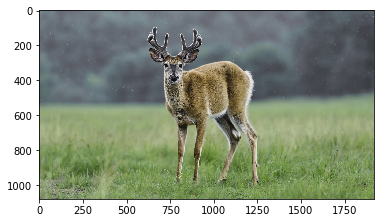

In [39]:
img = mpimg.imread("./data/deer_image.jpg")
plt.imshow(img)
plt.show()

In [40]:
print(type(img))
print(img.shape)
height, width, num_channels = img.shape
print("height:", height)
print("width:", width)
print("num_channels:", num_channels)
print(img[0][0])

<class 'numpy.ndarray'>
(1080, 1920, 3)
height: 1080
width: 1920
num_channels: 3
[122 139 147]


In [41]:
#Flatten the image
#I want a height*width length array where each element
#represents a single example -> length num_channels array. Each row is a single training example.
X = img.reshape(height*width, num_channels)
print(X.shape)
print(X)

(2073600, 3)
[[122 139 147]
 [120 137 145]
 [119 136 144]
 ...
 [117 146  79]
 [118 148  78]
 [120 150  78]]


In [42]:
#Randomly initialize K cluster centroids
#cluster_centroids = array with K rows, where each row is a num_channels length array
def init_centroids(K):
    return np.random.rand(K, 3)*255

In [43]:
#Total Cost function
def J(X, C, cluster_centroids):
    m = X.shape[0]#num training examples
    costs = np.array( [np.sum((X[i] - cluster_centroids[C[i]])**2) for i in range(m)] )
    return costs.mean()

In [44]:
#Returns C, where 0 <= C[i] < k. C[i] denotes which cluster
#has X[i]-th been assigned to.
def cluster_assignment(X, cluster_centroids):
    X = X[:,np.newaxis,:]
    dist = np.sum((X-cluster_centroids)**2, axis=2)
    return np.argmin(dist, axis=1)

In [45]:
def move_centroid(C, X, cluster_centroids):
    K = cluster_centroids.shape[0]
    for i in range(K):
        indices = np.argwhere(C==i).reshape(-1)
        cluster_centroids[i] = np.mean(X[indices],axis=0)

In [46]:
def coloring(X, C, cluster_centroids):
    tmp = np.array([cluster_centroids[C[i]].astype(np.uint8) for i in range(X.shape[0])])
    return tmp.reshape(height, width, num_channels)

In [47]:
def k_means_clustering(X, K):
    #initialize centroids randomly
    cluster_centroids = init_centroids(K)
    last_cost = 0
    i = 0
    while(True):
        i += 1
        #assign points to closest centroid
        C = cluster_assignment(X,cluster_centroids)
        
        #move centroids to the mean of their cluster points
        move_centroid(C, X, cluster_centroids)
        
        if(i%2==0):#every 20 iterations, print the cost and display the image
            new_cost = J(X, C, cluster_centroids)
            print("Cost at iteration",i,':',new_cost)
            
            #color image, each pixel corresponding to it's cluster
            colored_image = coloring(X, C, cluster_centroids)
            plt.figure()
            plt.imshow(colored_image)
            plt.show()
            
            if(new_cost==last_cost):#convergence test
                break
            last_cost = new_cost
                
    return C

Cost at iteration 2 : 903.6006706115461


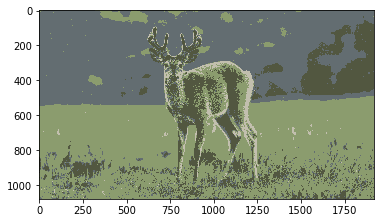

Cost at iteration 4 : 798.627386452745


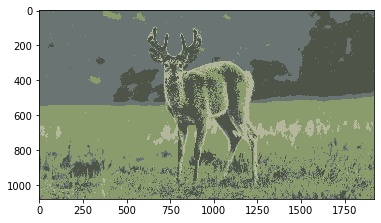

Cost at iteration 6 : 764.1393656339922


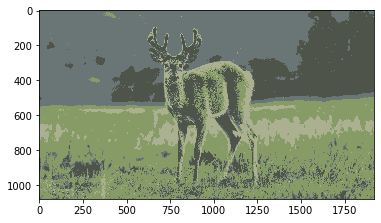

Cost at iteration 8 : 690.1412049674432


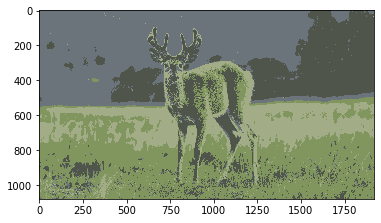

Cost at iteration 10 : 631.456432067301


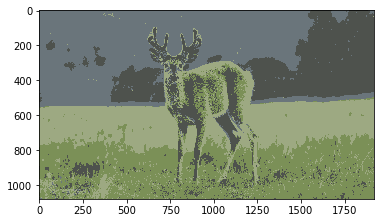

Cost at iteration 12 : 622.7320422835047


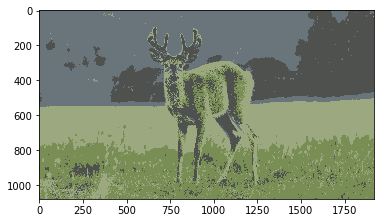

Cost at iteration 14 : 622.0085564734254


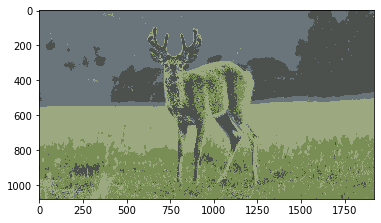

Cost at iteration 16 : 621.9687857900059


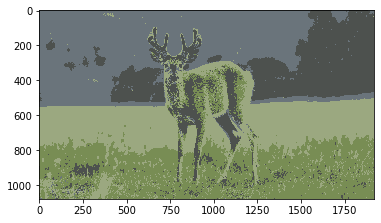

Cost at iteration 18 : 621.9626294329285


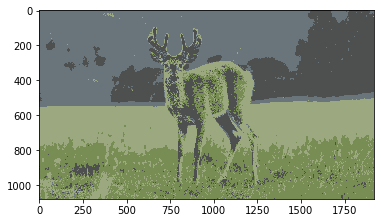

Cost at iteration 20 : 621.9617290023291


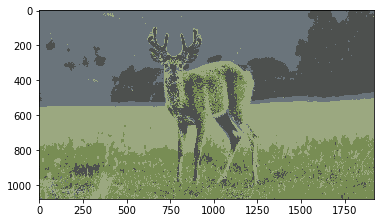

Cost at iteration 22 : 621.9617185633197


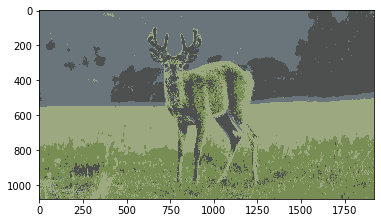

Cost at iteration 24 : 621.9617185633197


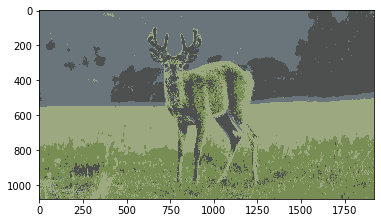

In [48]:
K = 4
C = k_means_clustering(X,K)